# Heart Failure Prediction with Deep Learning

#### Introduction
This Jupyter Notebook project is aimed at developing a deep learning model to predict heart failure based on historical data. The dataset used in this project is named "heart_failure.csv," which contains various characteristics related to patients' health. These characteristics include age, anemia, creatinine phosphokinase levels, diabetes, ejection fraction, high blood pressure, platelet count, serum creatinine, serum sodium levels, gender, smoking status, time, and the presence of a heart-related death event (DEATH_EVENT). The purpose of this project is to create a predictive model that can effectively identify patients at risk of heart failure using these features.

# Dataset
The dataset "heart_failure.csv" consists of 299 rows and 13 columns.
The columns in the dataset are as follows:

* 0. age (Age of the patient)
* anaemia (0 for no anemia, 1 for anemia)
* creatinine_phosphokinase (Level of creatinine phosphokinase)
* diabetes (0 for no diabetes, 1 for diabetes)
* ejection_fraction (Ejection fraction of the heart)
* high_blood_pressure (0 for no high blood pressure, 1 for high blood pressure)
* platelets (Platelet count)
* serum_creatinine (Level of serum creatinine)
* serum_sodium (Level of serum sodium)
* sex (0 for female, 1 for male)
* smoking (0 for non-smoker, 1 for smoker)
* time (Follow-up period)
* DEATH_EVENT (0 for no heart-related death event, 1 for heart-related death event)

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import numpy as np
import seaborn as sns

In [13]:
data = pd.read_csv("heart_failure.csv")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [15]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


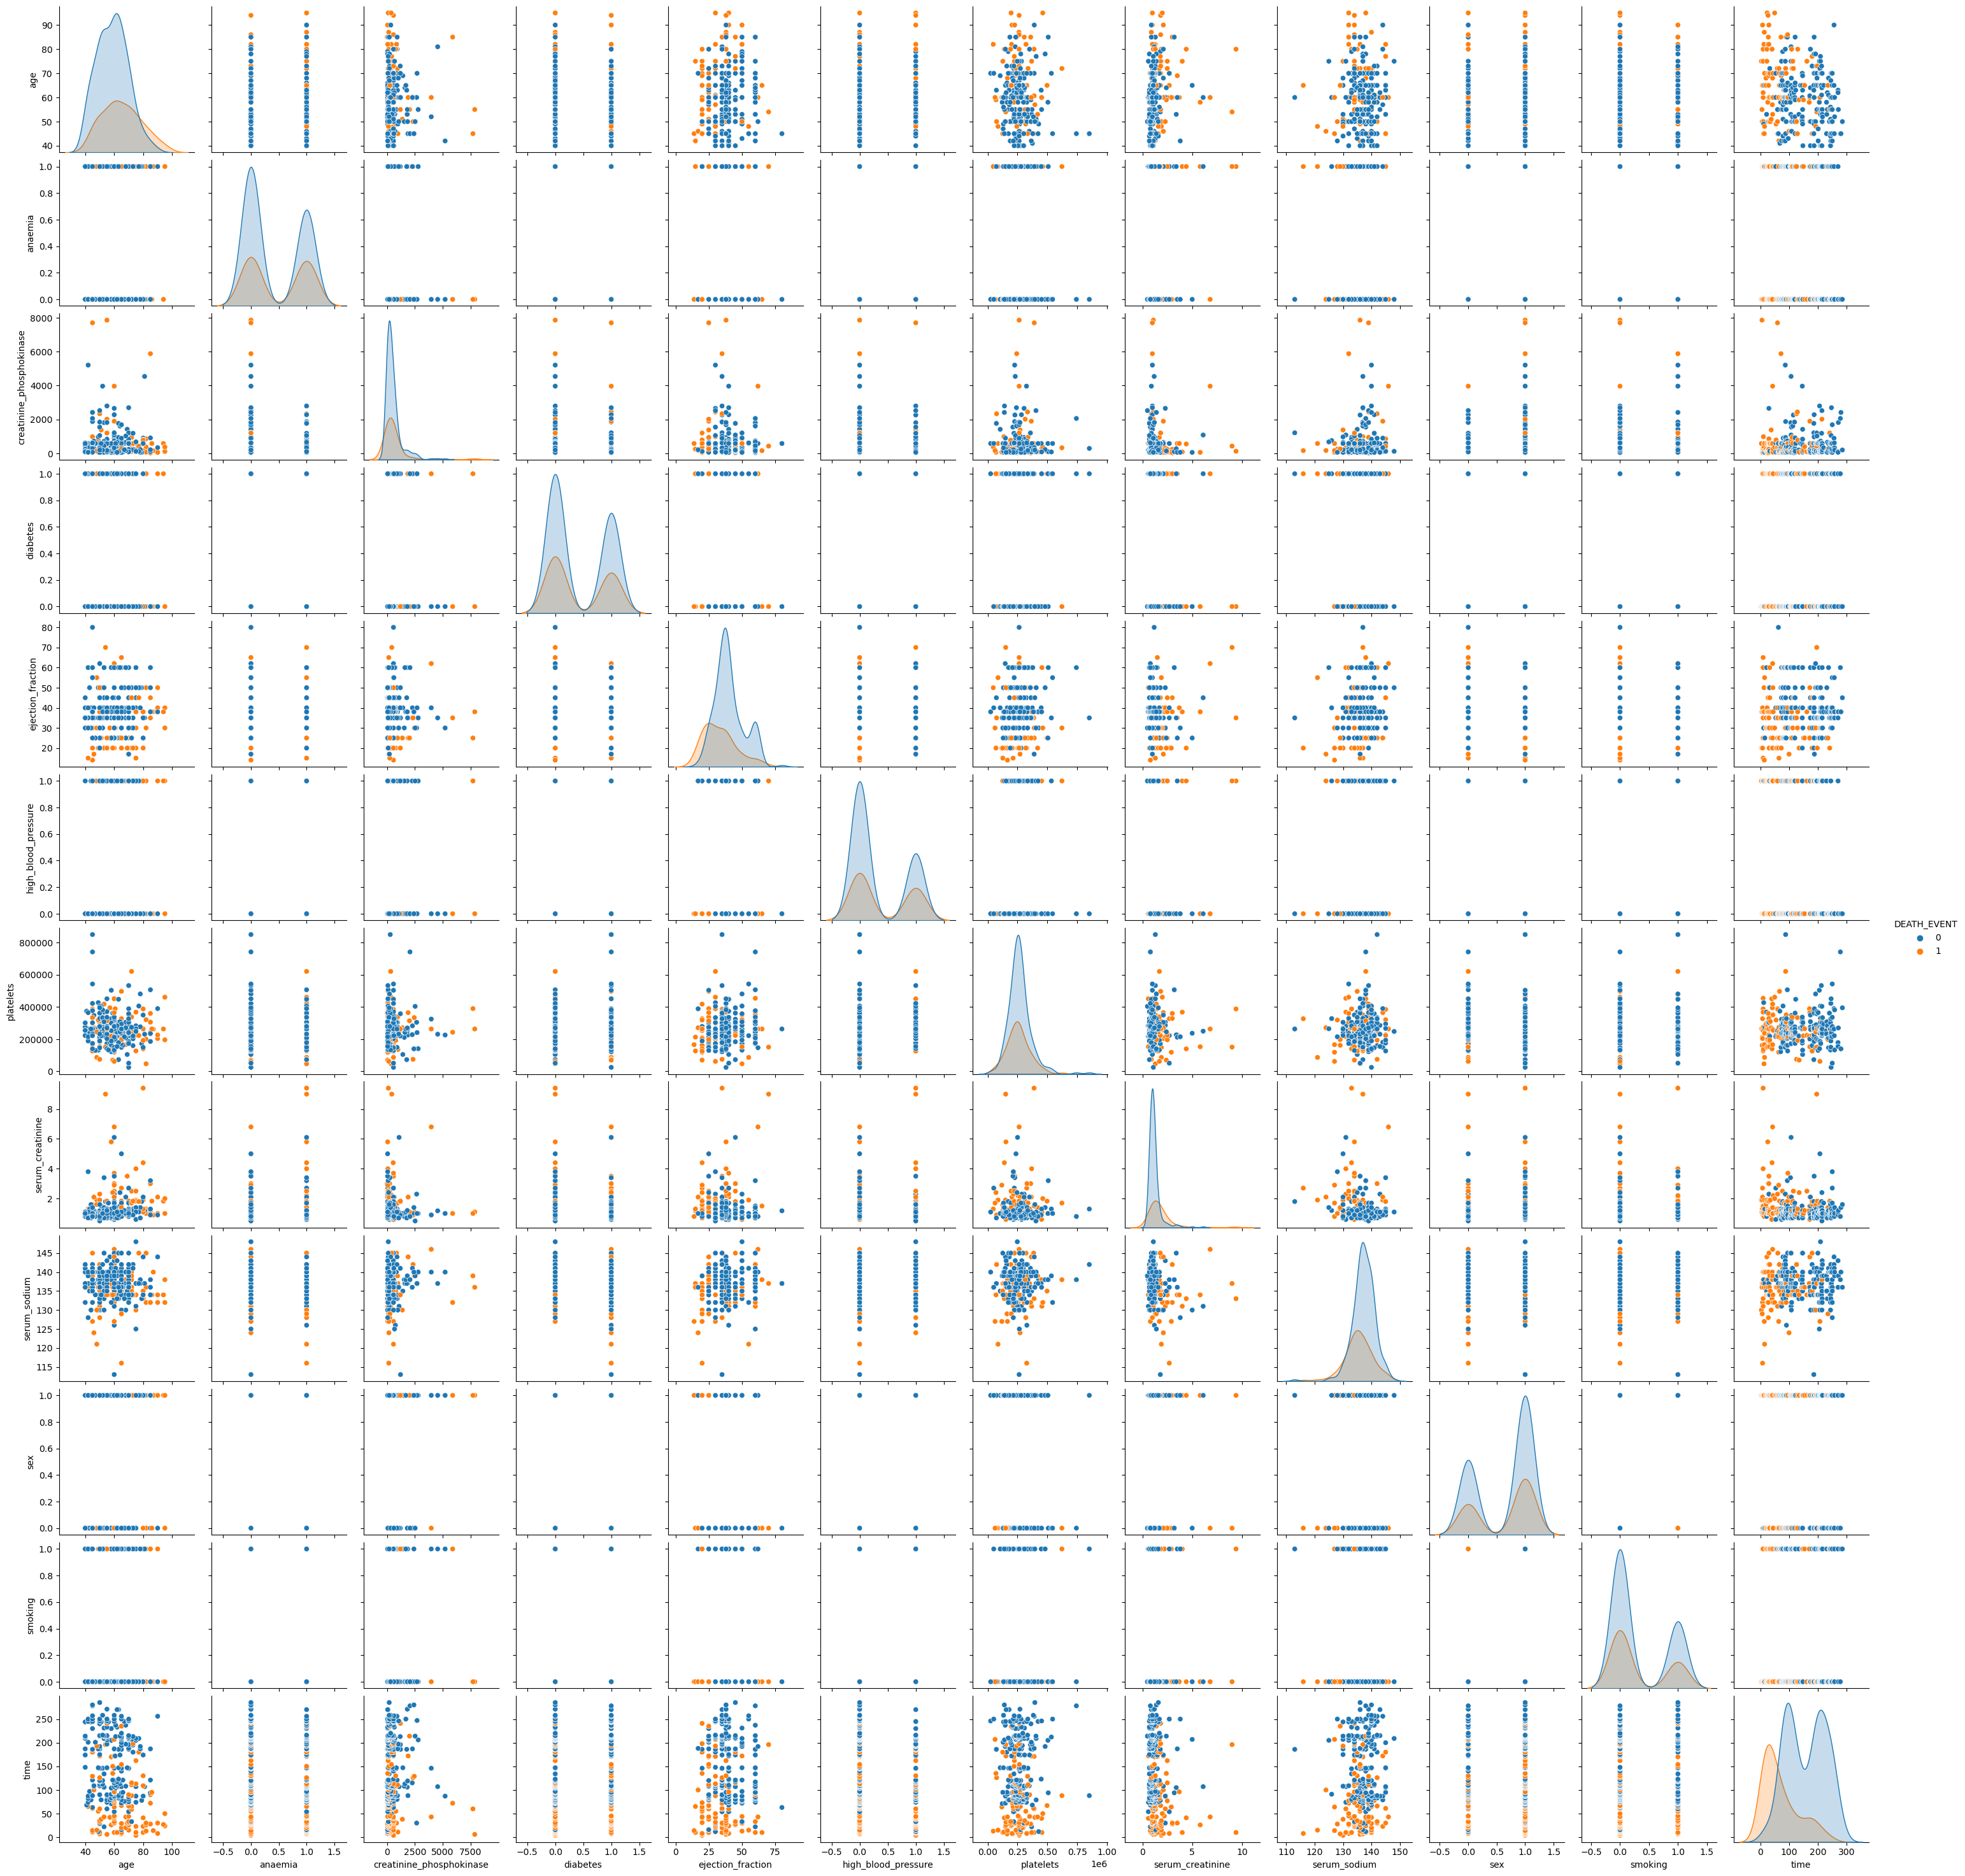

In [17]:
sns.pairplot(data, hue='DEATH_EVENT')
plt.show()

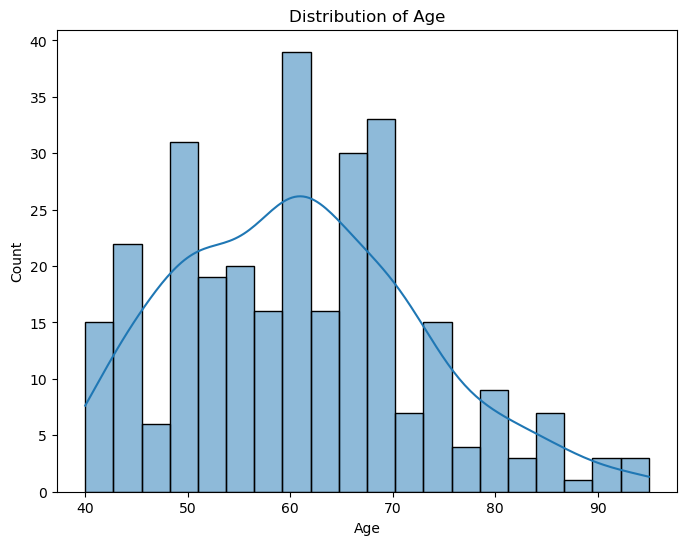

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the 'age' column
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

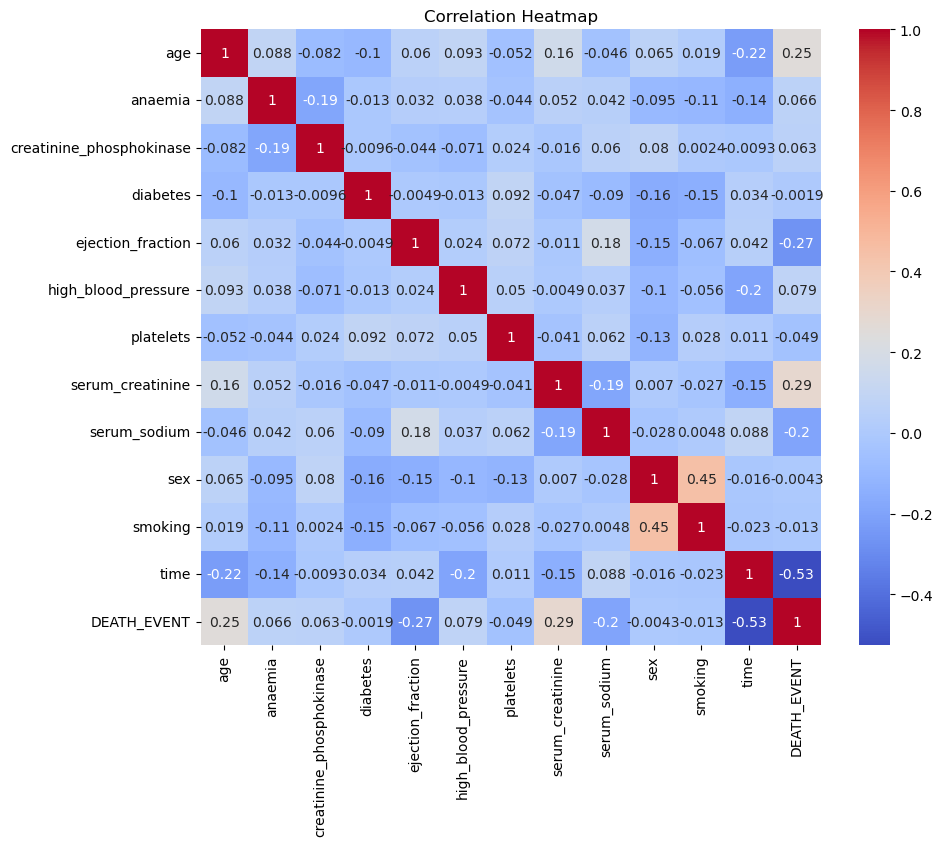

In [20]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

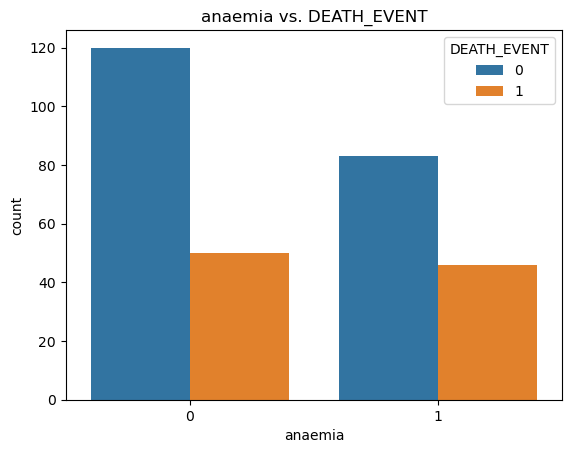

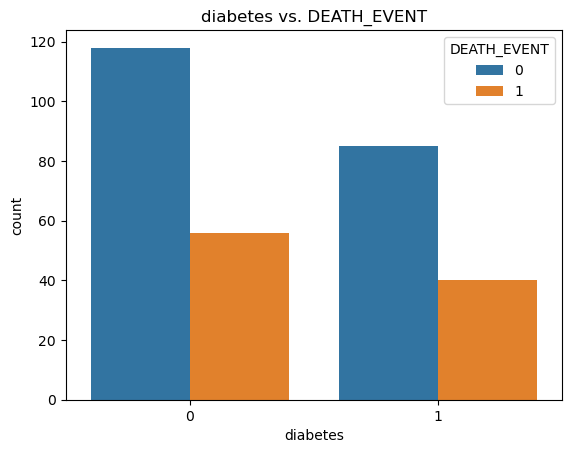

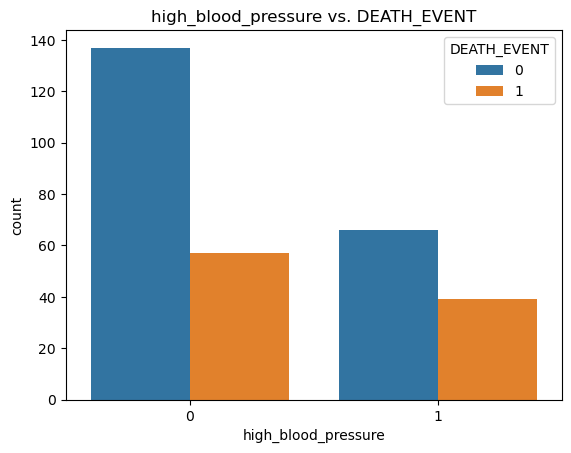

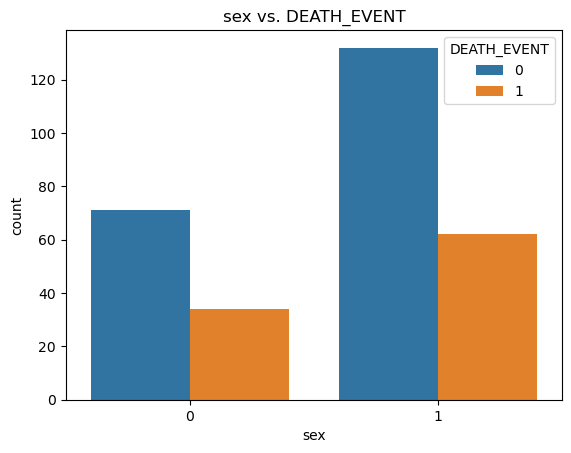

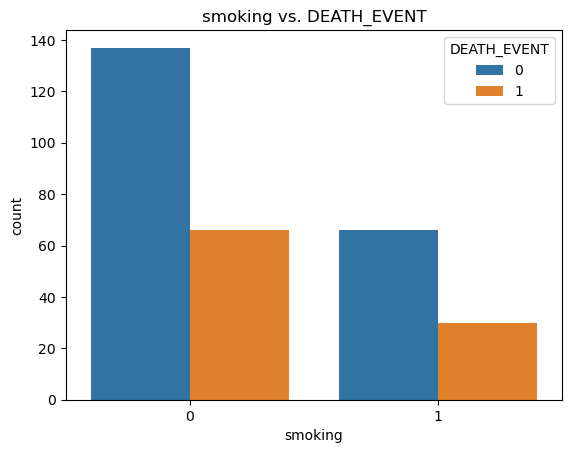

In [21]:
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for col in categorical_cols:
    sns.countplot(x=col, data=data, hue='DEATH_EVENT')
    plt.title(f'{col} vs. DEATH_EVENT')
    plt.show()

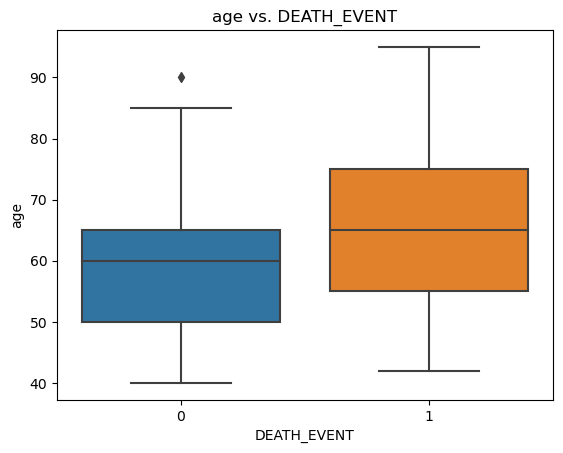

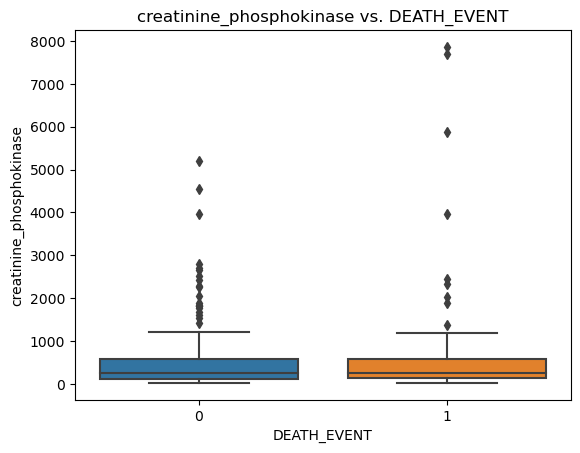

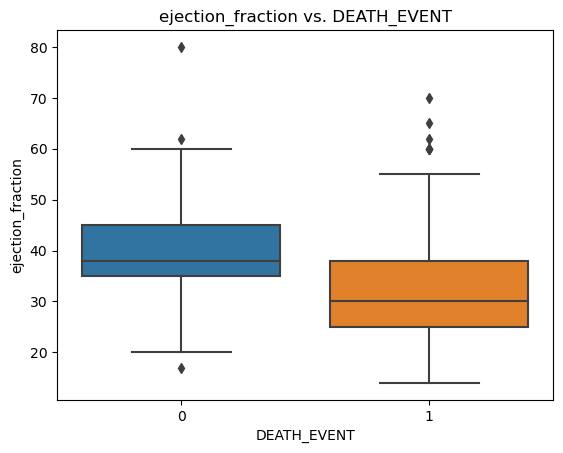

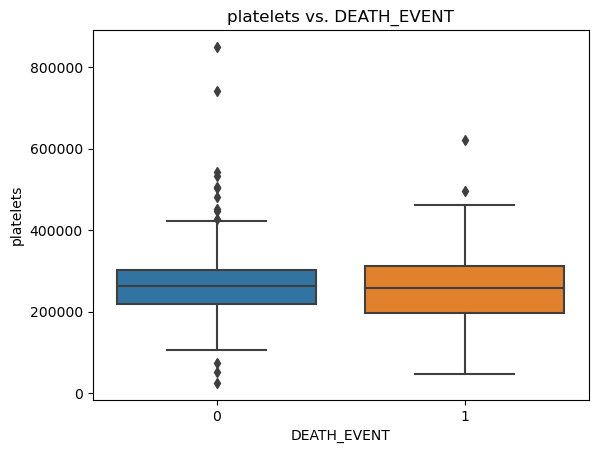

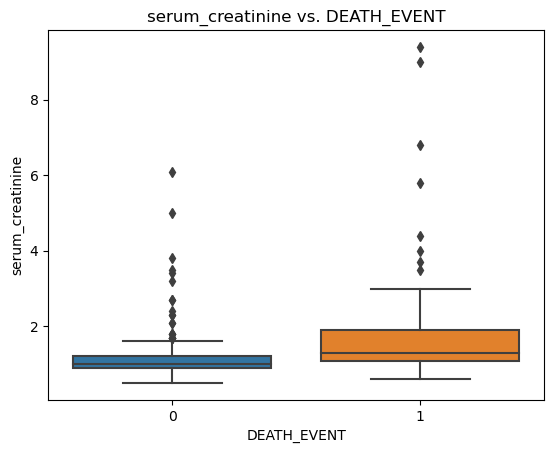

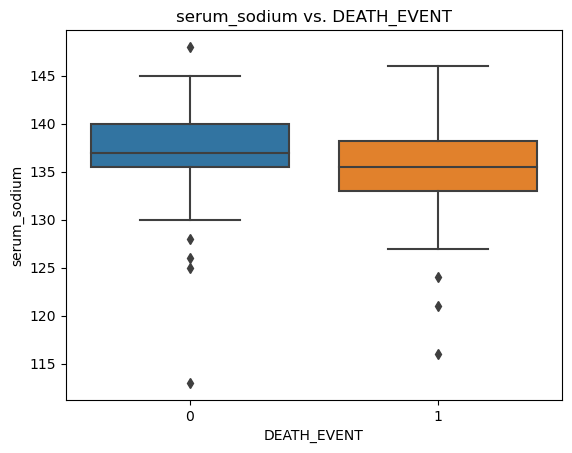

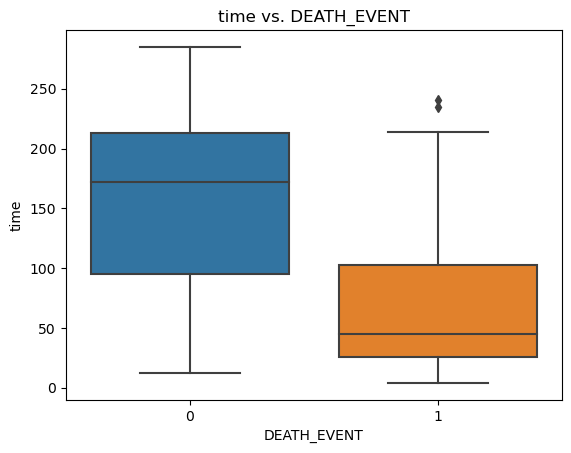

In [22]:
numerical_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

for col in numerical_cols:
    sns.boxplot(x='DEATH_EVENT', y=col, data=data)
    plt.title(f'{col} vs. DEATH_EVENT')
    plt.show()

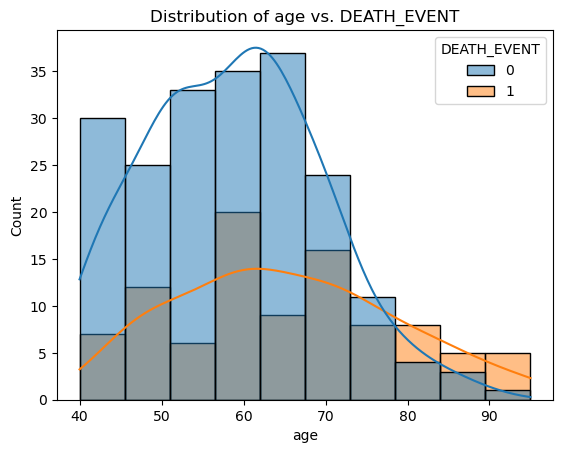

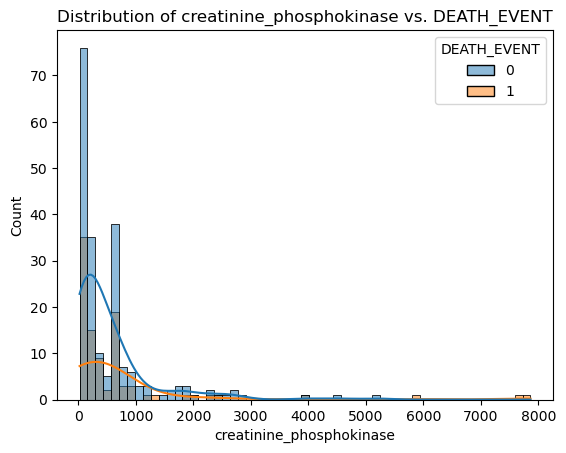

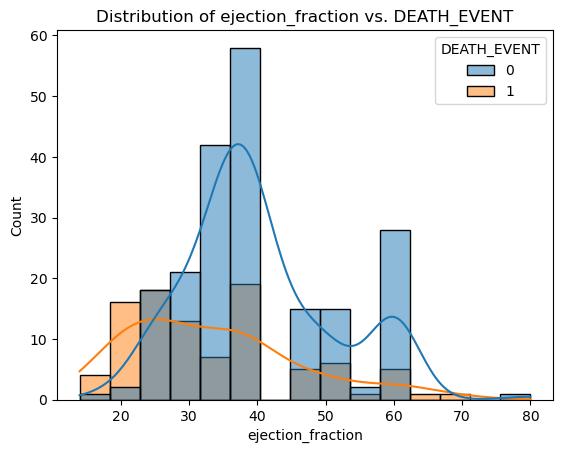

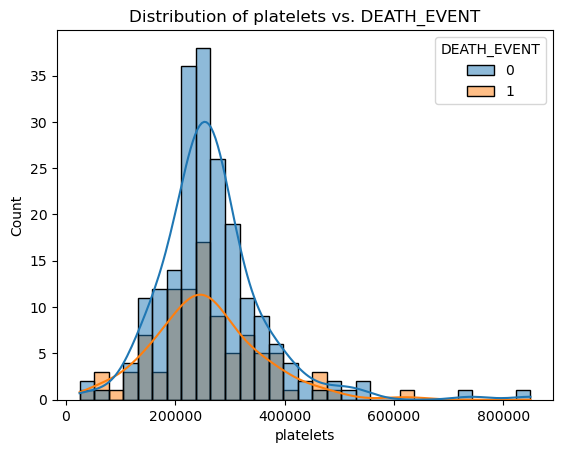

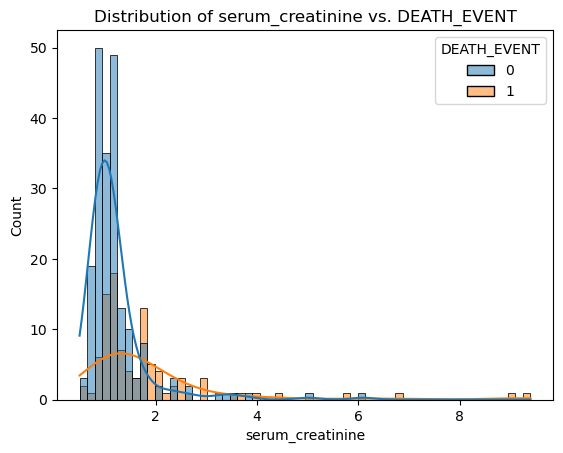

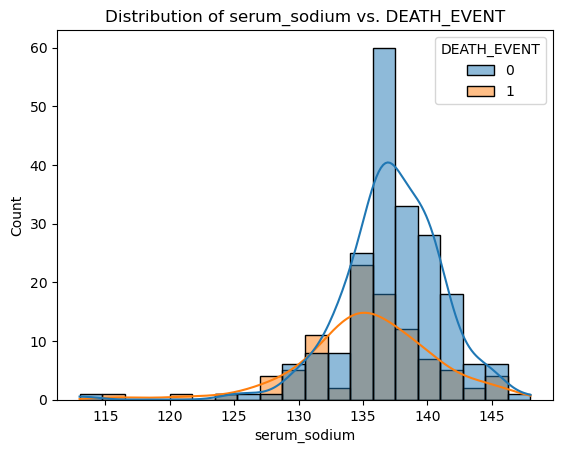

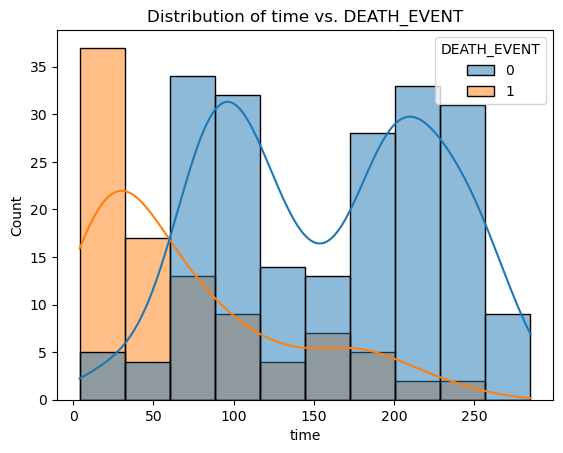

In [23]:
for col in numerical_cols:
    sns.histplot(data, x=col, hue='DEATH_EVENT', kde=True)
    plt.title(f'Distribution of {col} vs. DEATH_EVENT')
    plt.show()

In [24]:
Counter(data["DEATH_EVENT"])

Counter({0: 203, 1: 96})

In [25]:
y = data["DEATH_EVENT"]

In [26]:
x = data.drop(columns =["DEATH_EVENT"])

In [27]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [28]:
y.describe()

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: DEATH_EVENT, dtype: float64

In [29]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 299 entries, 0 to 298
Series name: DEATH_EVENT
Non-Null Count  Dtype
--------------  -----
299 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [31]:
ct = ColumnTransformer([("scale", StandardScaler(), ["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets","serum_creatinine","serum_sodium","sex","smoking","time"])])

In [32]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [33]:
Y_train.head()

258    0
37     1
97     0
191    0
135    0
Name: DEATH_EVENT, dtype: int64

In [34]:
le = LabelEncoder()

In [35]:
Y_train = le.fit_transform(Y_train.astype(str))

In [36]:
Y_test = le.fit_transform(Y_test.astype(str))

In [37]:
print(Y_test)

[0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0
 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 1]


In [38]:
Y_train = to_categorical(Y_train)

In [39]:
Y_test = to_categorical(Y_test)

In [40]:
print(Y_test[0])

[1. 0.]


In [41]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [42]:
model.compile(loss = "categorical_crossentropy", optimizer ="adam",metrics = ["accuracy"])

In [43]:
model.fit(X_train, Y_train, epochs= 100, batch_size= 16, verbose =1)

Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.6786
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.6786
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6920
Epoch 4/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5751 - accuracy: 0.7054
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5539 - accuracy: 0.7143
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7188
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7321
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.7455
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.7634
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7812
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.2916 - accuracy: 0.8839
Epoch 84/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2903 - accuracy: 0.8839
Epoch 85/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.8839
Epoch 86/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2892 - accuracy: 0.8839
Epoch 87/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.8839
Epoch 88/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8839
Epoch 89/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2868 - accuracy: 0.8839
Epoch 90/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2868 - accuracy: 0.8839
Epoch 91/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.8839
Epoch 92/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8839
Epoch 93/100


In [44]:
loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
print("Loss", loss, "Accuracy:", acc)

Loss 0.5741627216339111 Accuracy: 0.7599999904632568


In [48]:
y_estimate = model.predict(X_test)

3/3 [==============================] - 0s 8ms/step


In [49]:
y_estimate = np.argmax(y_estimate, axis = 1)

In [50]:
y_true = np.argmax(Y_test, axis =1)

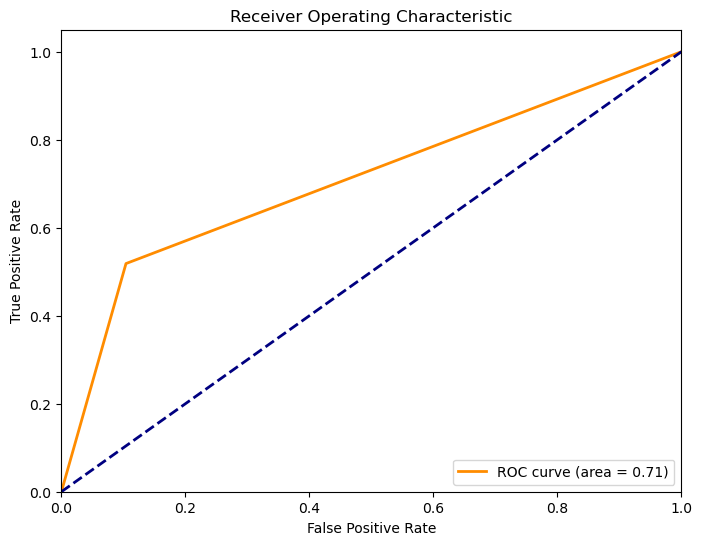

In [51]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_estimate)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [52]:
print(classification_report(y_true, y_estimate))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        48
           1       0.74      0.52      0.61        27

    accuracy                           0.76        75
   macro avg       0.75      0.71      0.72        75
weighted avg       0.76      0.76      0.75        75



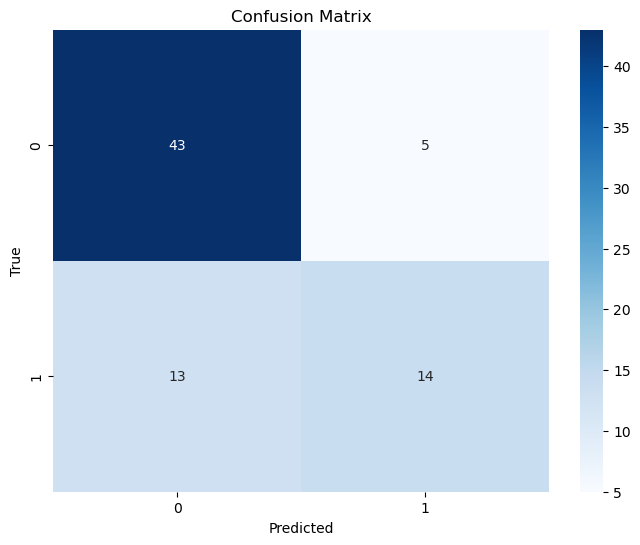

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_estimate)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()